# Capstone_Project_On_Olympics_Data :

# Step 3 (PYSPARK) :

# Introduction :

  The bellow data is all about the details of olympix. which goiving us the details like name,age and country of the Athlet,on which year and which date and on which sport he won the medal, which type of medal was it like gold or silver or bronze.

## Detailed Explanation of all columns is as follows :

1)name          - Name of the participated Athlet.

2)age           - age of the participated Athlet.

3)country       - country of the participated Athlet.

4)year          - On which year he won the medal.

5)Date_Given    - On which date he won the medal.

6)sports        - Name of the sport that he won the medal.

7)gold_medal    - Number of gold medals won.

8)silver_medal  - Number of silver medals won.

9)brone_medal   - Number of Bronze medals won.

10)total_medal  - Total number of medals won.

## Data_types of all columns is as follows :

1) name         -  Stastically it was Nominal level data where Python reads it as a String.

2) age          -  stastically it was Discrete data where Python reads it as a float.

3) country      -  Stastically it was Nominal level data where Python reads it as a String.

4) year         - stastically it was Discrete data where Python reads it as an integer.

5) Date_Given   - It can be boath Discrete and continuous where as pythos reads it as an Object.

6) sports       -  Stastically it was Nominal level data where Python reads it as a String.

7) Gold_medal   - stastically it was Discrete data where Python reads it as an integer.


8) Silver_medal - stastically it was Discrete data where Python reads it as an integer.

9) Brone_medal  - stastically it was Discrete data where Python reads it as an integer.

10)Total_medal  - stastically it was Discrete data where Python reads it as an integer.

In [1]:
pip install pyspark # Installing pyspark 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 199 kB 45.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=fea7bfd791039af87e0d6d5befe0fd62b03a758457772f42ede25fc17d5ddf27
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
#Initializing PySpark and importing the other required libraries
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import pyspark.sql.functions as f

#Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('Test').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [3]:
# Reading the csv file as a pyspark dataframe for data cleaning 
olympix_data = spark.read.format("csv").option("header", "true").option("inferSchema","true").load("/content/olympix_data_organized_with_header (1) (1).csv")  
olympix_data.show(5) # calling the Action

+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|            name|age|      country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|  Michael Phelps| 23|United States|2008| 8/24/2008|  Swimming|         8|           0|          0|          8|
|  Michael Phelps| 19|United States|2004| 8/29/2004|  Swimming|         6|           0|          2|          8|
|  Michael Phelps| 27|United States|2012|08-12-2012|  Swimming|         4|           2|          0|          6|
|Natalie Coughlin| 25|United States|2008| 8/24/2008|  Swimming|         1|           2|          3|          6|
|   Aleksey Nemov| 24|       Russia|2000|10-01-2000|Gymnastics|         2|           1|          3|          6|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----

# Data Cleaning :

## Dealing with missing values :

In [4]:
# checking the null values in the data frame
olympix_data.filter("name IS NULL AND age IS NULL AND country IS NULL AND year IS NULL AND Date_Given IS NULL AND sports IS NULL AND gold_medal IS NULL AND silver_medal IS NULL AND brone_medal IS NULL AND total_medal IS NULL").show()
# Here we can see there no any null values in entair all columns so we need to check columns individually

+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
|name|age|country|year|Date_Given|sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+



In [5]:
# Checking the null values in particular columns
olympix_data.filter("name IS NULL AND age IS NULL").show()
# BY checking one by one we got total of 10 null values 5 in name column and 5 in age column

+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+
|name| age|  country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|Argentina|2012|08-12-2012|    Hockey|         0|           1|          0|          1|
|null|null|Argentina|2012|08-12-2012|    Hockey|         0|           1|          0|          1|
+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+



In [6]:
# Dropping those 5 rows which had null values in name and age  column
olympix_data = olympix_data.na.drop(subset = ['name','age'])

In [7]:
# Checking whether the null values are dropped or not 
olympix_data.filter("name IS NULL AND age IS NULL").show()

+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
|name|age|country|year|Date_Given|sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+



## Explanation :
###Here we can clearly see that there no null values present because we had dropped the null valued rows successfully.

## Dealing with duplicated values :

In [8]:
# dropping the duplicated values (if any) present in the data set by using dropDuplicated() function.
olympix_data = olympix_data.dropDuplicates()

### If we calculate the duplicated values based on column we get lot of duplicated values But we con't drop them by column wise because in the above data set in the name column there is a possibility that the same person can participate next year's competition. 
### where as in the age column because of age criteria the age of the Athlets maybe match so there is a chance of duplication 
### soo here we cont drop the duplicated values based on columns because it dosen't make sense. 

In [9]:
# saving the cleaned data set 
olympix_data.write.option("header",True).csv("olympix_cleaned_data")

# Attribute Analysis :

## 1)Write PySpark code to read the olympix_data.csv file

In [10]:
# Reading the csv file which saved after data cleaning process as pyspark DataFrame
olympix_data_spark = spark.read.format("csv").option("header", "true").option("inferSchema","true").load("/content/olympix_cleaned_data")  
olympix_data_spark.show() # calling the Action

+--------------------+---+--------------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|             country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+--------------------+----+----------+--------------------+----------+------------+-----------+-----------+
|           Wang Meng| 20|               China|2006| 2/26/2006|Short-Track Speed...|         1|           1|          1|          3|
|          Rita König| 23|             Germany|2000|10-01-2000|             Fencing|         0|           1|          1|          2|
|       Botond Storcz| 25|             Hungary|2000|10-01-2000|            Canoeing|         2|           0|          0|          2|
|Ole Einar Bjørndalen| 36|              Norway|2010| 2/28/2010|            Biathlon|         1|           1|          0|          2|
|       Roser Tarragó| 19|               Spain|2012|08-12-2012|      

## 2) Write PySpark code to print the Olympic Sports/games in the dataset.

In [11]:
# code to print only the sports column in the data set without repetition by using distinct() function.
sports_col = olympix_data_spark.select('sports').distinct()
sports_col.show() # calling the Action

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
+--------------------+
only showing top 20 rows



## 3) Write PySpark code to plot the total number of medals in  each Olympic Sport/game

In [14]:
# calculating the total number of medals in each olympic sport
medals_by_each_sport_spark = olympix_data_spark.groupBy("sports").sum("total_medal")
medals_by_each_sport_spark.show() # calling the Action

+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|          Gymnastics|             282|
|              Tennis|              78|
|              Boxing|             188|
|Short-Track Speed...|             138|
|          Ice Hockey|             384|
|              Rowing|             576|
|                Judo|             224|
|            Softball|             134|
|             Sailing|             210|
|            Swimming|             765|
|       Alpine Skiing|              90|
|          Basketball|             287|
|            Handball|             351|
| Rhythmic Gymnastics|              84|
|            Biathlon|             138|
|           Triathlon|              24|
|           Badminton|              96|
|           Athletics|             753|
|      Figure Skating|              54|
|    Beach Volleyball|              48|
+--------------------+----------------+
only showing top 20 rows



In [16]:
# converting the pyspark dataframe to pandas dataframe to plot the appropriate graph for visualized representation
medals_by_each_sport_pandas = medals_by_each_sport_spark.toPandas()
medals_by_each_sport_pandas # calling the function

,sports,sum(total_medal)
0,Gymnastics,282
1,Tennis,78
2,Boxing,188
3,Short-Track Speed Skating,138
4,Ice Hockey,384
5,Rowing,576
6,Judo,224
7,Softball,134
8,Sailing,210
9,Swimming,765


In [17]:
# importing the required libraries to plot the graph
import matplotlib.pyplot as plt
import seaborn as sns

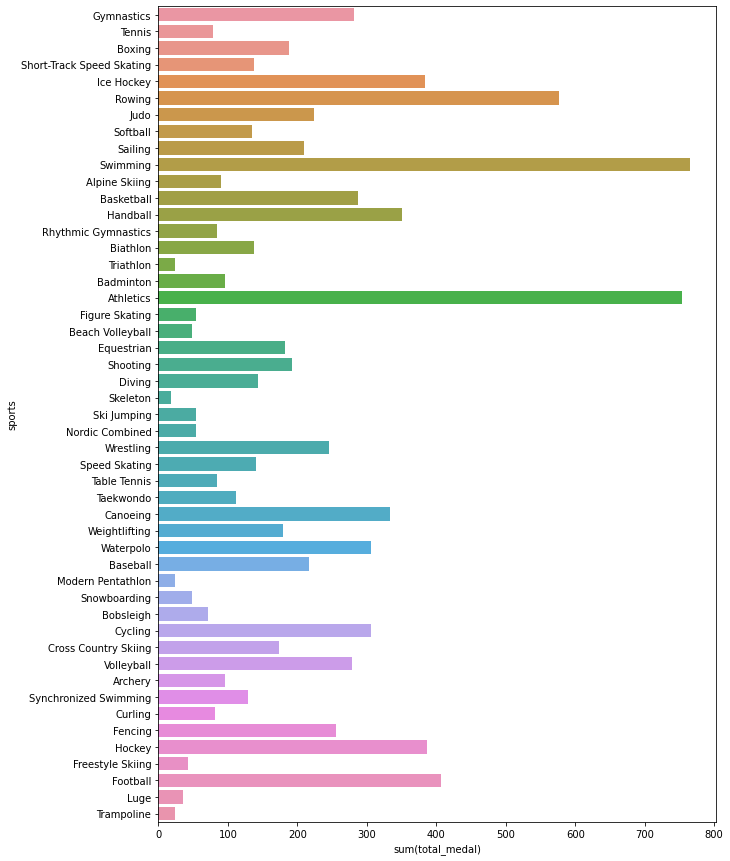

In [18]:
fig = plt.figure(figsize=(10,15)) # giving the dimenctions to the figure 
# ploting the bar graph to represent the above result in diagramatic format
result = sns.barplot(x='sum(total_medal)',y = 'sports',data =medals_by_each_sport_pandas)

## Explanation :
### By analysing the above figure we can say that most number of medals were won in swiming and Atheltics is in second place there are 2-3 sports on which the participents won least number of medals.

## 4) Sort the result based on the total number of medals.

In [ ]:
# using orderby to sort the dataset based on total_medal column
sorted = olympix_data_spark.orderBy(f.asc("total_medal"))
sorted.show(5) # calling Tha action 


+-----------------+---+--------------------+----+----------+--------------------+----------+------------+-----------+-----------+
|             name|age|             country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+-----------------+---+--------------------+----+----------+--------------------+----------+------------+-----------+-----------+
|       Vasa Mijic| 27|Serbia and Monten...|2000|10-01-2000|          Volleyball|         1|           0|          0|          1|
|    Crystl Bustos| 23|       United States|2000|10-01-2000|            Softball|         1|           0|          0|          1|
|Huang Chih-Hsiung| 23|      Chinese Taipei|2000|10-01-2000|           Taekwondo|         0|           0|          1|          1|
|           Luo Xi| 24|               China|2012|08-12-2012|Synchronized Swim...|         0|           1|          0|          1|
|  Yevgeny Lagunov| 22|              Russia|2008| 8/24/2008|            Swimming|         

In [ ]:
# checking whether the data was sorted as per our requirement or not 
sorted.select('total_medal').show(5)

+-----------+
|total_medal|
+-----------+
|          1|
|          1|
|          1|
|          1|
|          1|
+-----------+
only showing top 5 rows



## Explanation :
### Here we can see that the required column was successfully sorted as per our requirement.

## 5) Find the total number of medals won by each country in swimming.

In [ ]:
# filtering the record based on sports swimming 
swimming_data = olympix_data_spark.filter((olympix_data_spark.sports == 'Swimming'))
# finding no of medals by each country  groupping by country and counting the filtered data set based on sports = swimming  
swimming_data.groupBy("country").count().show()

+-------------+-----+
|      country|count|
+-------------+-----+
|       Russia|   19|
|       Sweden|    7|
|      Germany|   27|
|       France|   26|
|     Slovakia|    1|
|    Argentina|    1|
|Great Britain|    9|
|        China|   29|
|United States|  145|
|      Belarus|    1|
|      Croatia|    1|
|        Italy|   13|
|    Lithuania|    1|
|       Norway|    2|
|        Spain|    2|
|      Denmark|    1|
|      Ukraine|    4|
|  South Korea|    2|
|     Zimbabwe|    2|
|      Tunisia|    2|
+-------------+-----+
only showing top 20 rows



## Explanation :
### By using the above result set we can calculate the which country won the most number of medals in swimming and which country won the least number of medals in swimming.

## 6) Find the total number of medals won by each country in Skeleton.

In [19]:
# filtering the record based on sports Skeleton 
Skeleton_data = olympix_data_spark.filter((olympix_data_spark.sports == 'Skeleton'))
# finding no of medals by each country  groupping by country and counting the filtered data set based on sports = Skeleton  
Skeleton_data.groupBy("country").count().show()

+-------------+-----+
|      country|count|
+-------------+-----+
|       Russia|    1|
|      Germany|    2|
|Great Britain|    3|
|United States|    3|
|  Switzerland|    3|
|       Latvia|    1|
|       Canada|    4|
|      Austria|    1|
+-------------+-----+



## Explanation :
### By the above result set we can clearly say that the country canada won the most number of medals on the sports skeleton and the countries Russia,Austria,Latvia were won only one medal is skeleton and stood at last position in particular sport.

## 7) Find the number of medals that the US won yearly. 

In [21]:
# filtering the records based on country = United states.
medals_won_by_us = olympix_data_spark.filter((olympix_data_spark.country == 'United States'))
# counting the total number of medals won by us year wise from filtered data set.
medals_won_by_us_year_wise = medals_won_by_us.groupBy("year").sum("total_medal")
medals_won_by_us_year_wise.show() # calling the Action.

+----+----------------+
|year|sum(total_medal)|
+----+----------------+
|2006|              52|
|2004|             265|
|2012|             254|
|2000|             243|
|2010|              97|
|2008|             317|
|2002|              84|
+----+----------------+



## Explanation :
### By the above result set we can clearly say that the country united states won most number of medals in 2008 by winning 317 medals, where as it won least number of medals in 2006 by winning 52 medals.

## 8) Find the total number of medals won by each country.


In [20]:
# calculating the total number of medals won by each country by using group by and sum functions
medals_by_each_country = olympix_data_spark.groupBy("country").sum("total_medal")
medals_by_each_country.show() # calling the Action.

+--------------+----------------+
|       country|sum(total_medal)|
+--------------+----------------+
|        Russia|             768|
|      Paraguay|              17|
|Chinese Taipei|              20|
|        Sweden|             181|
|       Eritrea|               1|
|      Malaysia|               3|
|     Singapore|               7|
|        Turkey|              28|
|       Germany|             629|
|   Afghanistan|               2|
|         Sudan|               1|
|        France|             318|
|        Greece|              59|
|     Sri Lanka|               1|
|          Togo|               1|
|       Algeria|               8|
|      Slovakia|              35|
|     Argentina|             139|
|       Belgium|              18|
| Great Britain|             322|
+--------------+----------------+
only showing top 20 rows



## Explanation :
### By using the above result set we can easily find which country won most number of medals by using max() function and which country won the lest number of medals by using the min() function.

## 9) Who was the oldest athlete in the olympics? 


In [22]:
olympix_data_spark.createOrReplaceTempView("olympix") # creating a view to write an SQL
# writing an SQL query to calculate the oldest athlet in the olympix
oldest_athlet = spark.sql("select name,age from olympix where age = (select max(age) from olympix)") 
oldest_athlet.show() # calling the Action

+----------+---+
|      name|age|
+----------+---+
|Ian Millar| 61|
+----------+---+



## Eaplanation :
### Here we can see that the athlet Ian Millar was the oldest athelt in the olympix with the age of 61 years.

## 10) Which country was he/she from?

In [23]:
olympix_data_spark.createOrReplaceTempView("olympix") # creating a view to write an SQL
# writing an SQL query to calculate the oldest athlet in the olympix and which country he residing.
oldest_athlet = spark.sql("select name,country,age from olympix where age = (select max(age) from olympix)") 
oldest_athlet.show() # calling the Action

+----------+-------+---+
|      name|country|age|
+----------+-------+---+
|Ian Millar| Canada| 61|
+----------+-------+---+



## Eaplanation :
### Here we can see that the athlet Ian Millar was the oldest athelt in the olympix with the age of 61 years and he belongs to the country Canada.